
### 首先，回顾一下因子分析

前面讲因子分析的时候我们比较实际数据的 covariance matrix 和 reproduced matrix
（model implied covariance matrix）
###  
### 如果模型关系合理的话，covariance matrix 和 reproduced matrix没有明显区别，

为此，我们提出零假设：

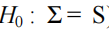

也就意味着，如果这个模型没问题，不会有太多变异未被解释

###  求解结构方程的过程

估计一个结构方程模型的过程，实际上是求解 S（covariance matrix）– Σ（reproduced matrix） 尽可能小时的参数结果。

假设我们现在有下面correlation matrix

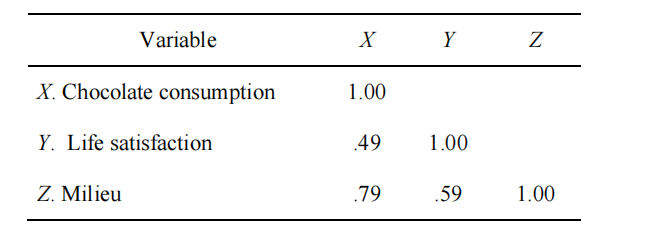

我们认为有下面模型

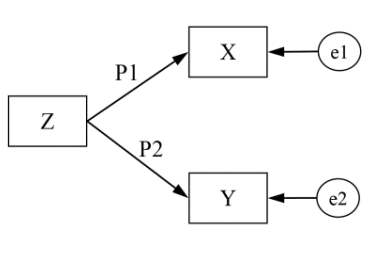

我们使用 ordinary least squares（OLS）法来估计这些参数，这是一个不断迭代来找 S – Σ 最少的情况。

discrepancy functions： F = ∑d²，其中d 是观察correlation 和 reproduced correlation的差异。

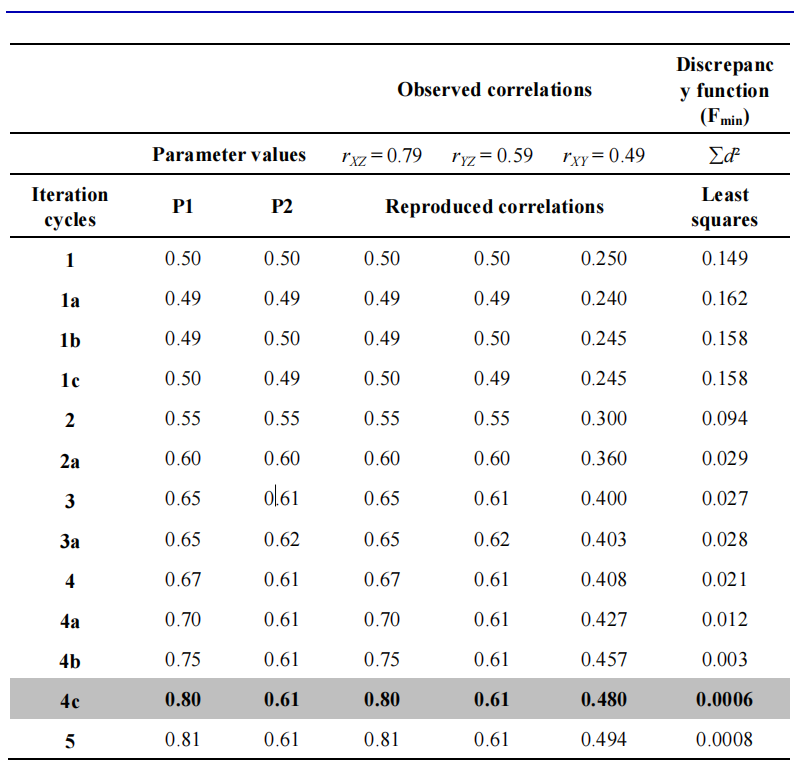

第一次迭代中， P1 和 P2 都是 0.5， 可知 得到此时的 reproduced correlations，

原来 correlation 一一对应，减去reproduced correlations：

Fmin = (0.79 – 0.50)² + (0.59 – 0.50)² + (0.49 – 0.25)² = 0.149

不断迭代，我们发现最后Fmin = 0.0006 时达到最小，取此时的参数：

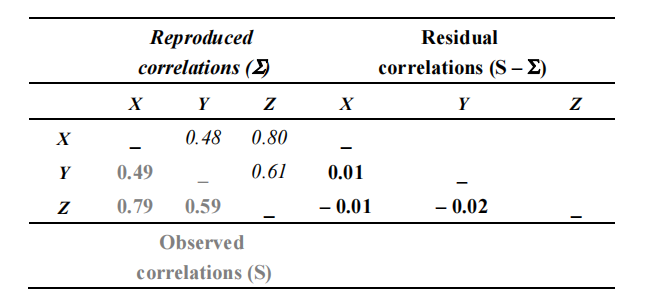

### 
如果把模型换成如下：

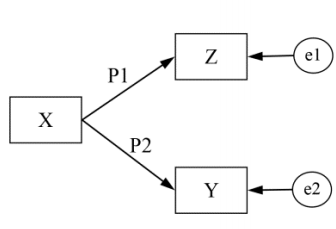

同理：

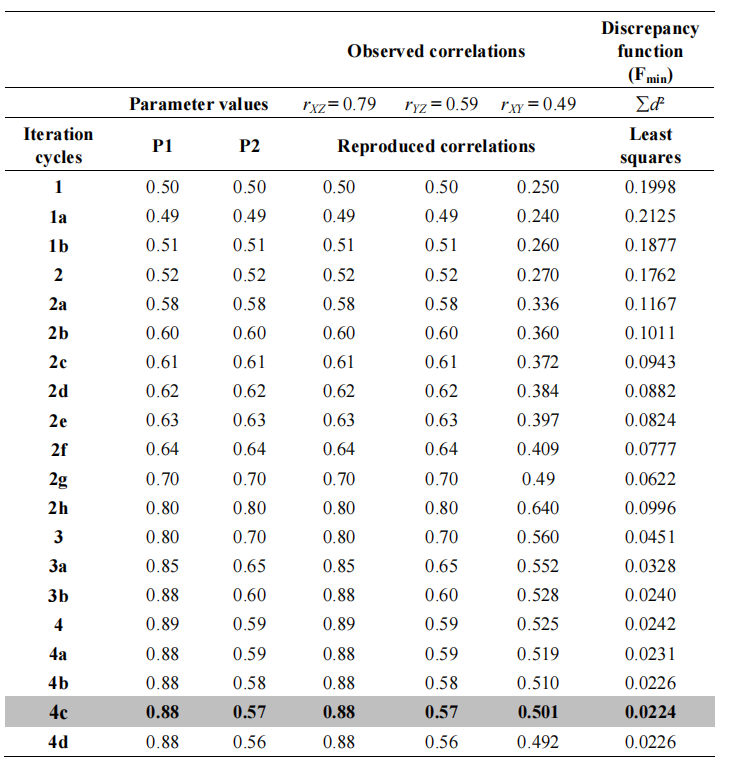

最后的残差阵：

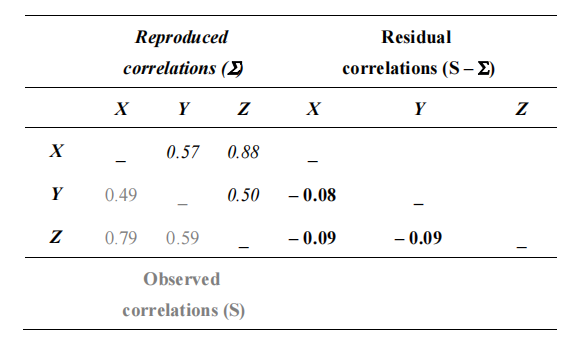

###  
### χ² （df）帮助确定是否拒绝零假设：

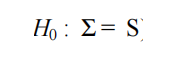

### χ²计算 ：

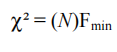

其中N是样本量， Fmin 是我们前面讲的 minimum discrepancy (F[S, Σ])

当 χ² = 0时，意味着 (F[S, Σ] = 0.00

###  
###  df计算:
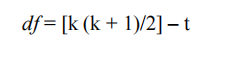

k 是观测变量，t是该模型中需要估计的参数数量



###  
### χ²/df

由于N*Fmin 的分布服从χ²分布，χ²/df是否落在拒绝阈内？

是，拒绝 H0
否，接受 H0

### 
### 以上迭代思路是SEM求解的一般思路，在这个框架下，可能有别的估计方法。
### 问：除了最小二乘法（OLS），还有哪些估计方法可以计算 Fmin ？
#### 
###  1. 数据满足多元正态假设时：
#### 
###  最大似然法（maximum likelihood method， ML, FML)
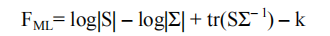
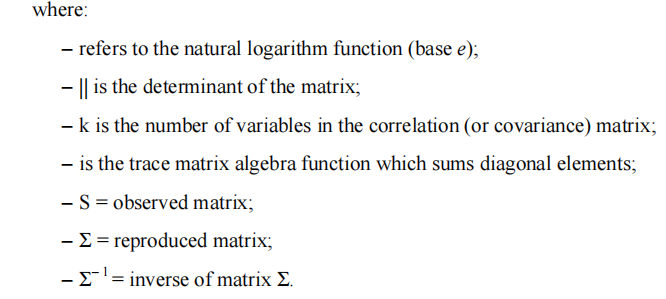
#### 
### 广义最小二乘（ Generalized Least Squares， GLS）
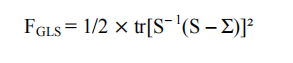
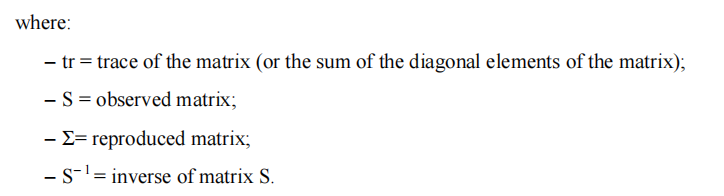

### 
### 2. 数据不满足多元正态假设时：

上节课讲过，SEM 是一种依赖多元正态性的方法， 当数据不满足多元正态性时，可以采取一些方法补救。

但是这好比玉石上有块斑，补救只能是遮瑕，瑕疵终归是瑕疵。

### 有大概三种类型的弥补非正态的估计方法
##### 
### 第一类：Roubst ML与两种 scaled χ²

 Satorra-Bentler χ² (SBχ²)， 对应 lavaan 是“MLM”
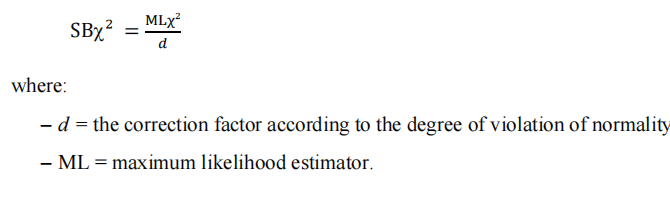
#####  
 Yuan-Bentler χ² (YBχ²)，对应lavaan是“MLR”

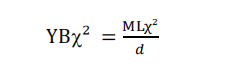
其纠正因子 d 有别于上面，适用于小样本情况
##### 
### 第二类：加权最小二乘（weighted least squares method， WLS）和对角加权最小二乘（Diagonally Weighted Least Squares，DWLS）

WLS 和 DWLS 都是在广义最小二乘的基础上加入了一个权重矩阵，两者都不太适用于结构复杂的SEM（变量不超过20）

WLS 的特点是需要用更多的数据量，在lavaan中对应“WLS”

DWLS 适用于较小的样本量，在lavaan中有两个版本“WLSM”和“WLSV”

### 第三类：Boostrap
有放回随机抽样

####
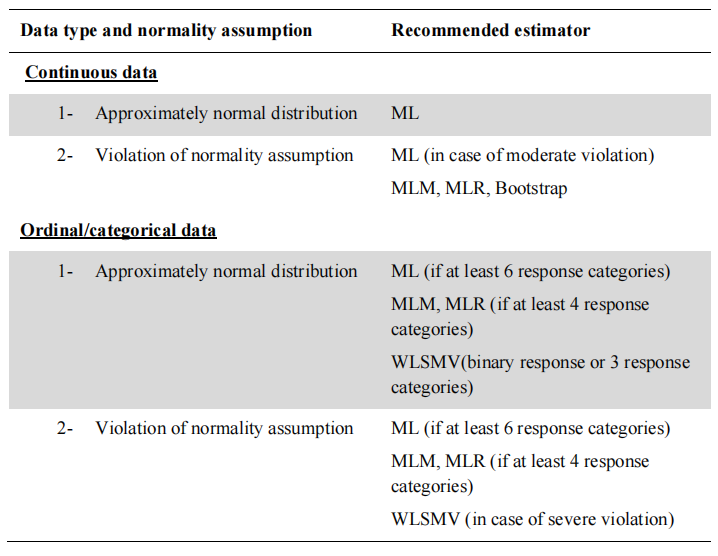

In [19]:
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [20]:
data <- iris[,c(1:4)]
library(QuantPsyc)

#测试数据集的偏度和峰度中的多元正态性。

mult.norm(data)$mult.test

,Beta-hat,kappa,p-val
Skewness,2.643635,66.0908694,7.812701e-07
Kurtosis,23.424184,-0.5089541,6.107844e-01


In [21]:
library(lavaan)
model <- "
flowerquality =~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width

"
model_fit <- sem(model,data)
model_fit

Warning message in lav_object_post_check(object):
"lavaan WARNING: some estimated ov variances are negative"


lavaan 0.6-12 ended normally after 29 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         8

  Number of observations                           150

Model Test User Model:
                                                      
  Test statistic                                59.593
  Degrees of freedom                                 2
  P-value (Chi-square)                           0.000

In [22]:
model_fit <- sem(model,data,estimator  = 'MLM')
model_fit

Warning message in lav_object_post_check(object):
"lavaan WARNING: some estimated ov variances are negative"


lavaan 0.6-12 ended normally after 29 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         8

  Number of observations                           150

Model Test User Model:
                                              Standard      Robust
  Test Statistic                                59.593      51.227
  Degrees of freedom                                 2           2
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  1.163
    Satorra-Bentler correction                                    

In [23]:
model_fit <- sem(model,data, bootstrap = 1000)
model_fit

Warning message in lav_object_post_check(object):
"lavaan WARNING: some estimated ov variances are negative"


lavaan 0.6-12 ended normally after 29 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         8

  Number of observations                           150

Model Test User Model:
                                                      
  Test statistic                                59.593
  Degrees of freedom                                 2
  P-value (Chi-square)                           0.000